<a href="https://www.kaggle.com/code/akshayr009/kidney-diseases-0-999-accuracy?scriptVersionId=100005492" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [18]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread


In [19]:
# Define path to the data directory
data_dir = Path('../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
train_dir

PosixPath('../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

In [20]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')


# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []


# Go through all the Cyst_cases . The label for these cases will be 1
for img in Cyst_cases:
    train_data.append((img, 0))
    # Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,1))

# Go through all the normal cases. The label for these cases will be 0
for img in Stone_cases:
    train_data.append((img,2))

# Go through all the Tumor_cases . The label for these cases will be 1
for img in Tumor_cases:
    train_data.append((img, 3))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,../input/ct-kidney-dataset-normal-cyst-tumor-a...,1
1,../input/ct-kidney-dataset-normal-cyst-tumor-a...,0
2,../input/ct-kidney-dataset-normal-cyst-tumor-a...,0
3,../input/ct-kidney-dataset-normal-cyst-tumor-a...,1
4,../input/ct-kidney-dataset-normal-cyst-tumor-a...,2


In [21]:
train_data['label'].unique()

array([1, 0, 2, 3])

In [22]:
train_data.shape

(12446, 2)

1    5077
0    3709
3    2283
2    1377
Name: label, dtype: int64


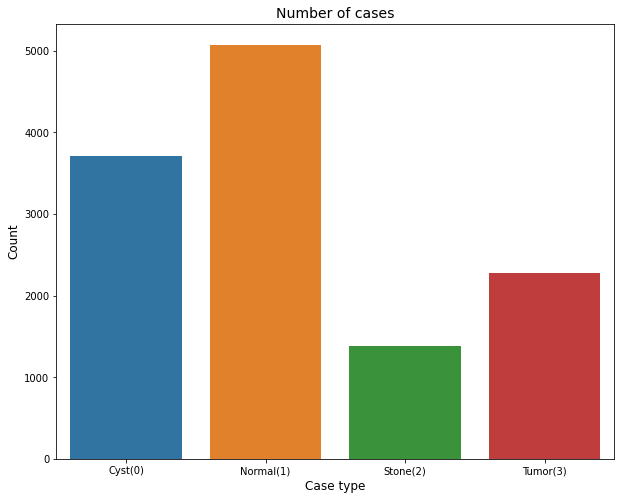

In [23]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

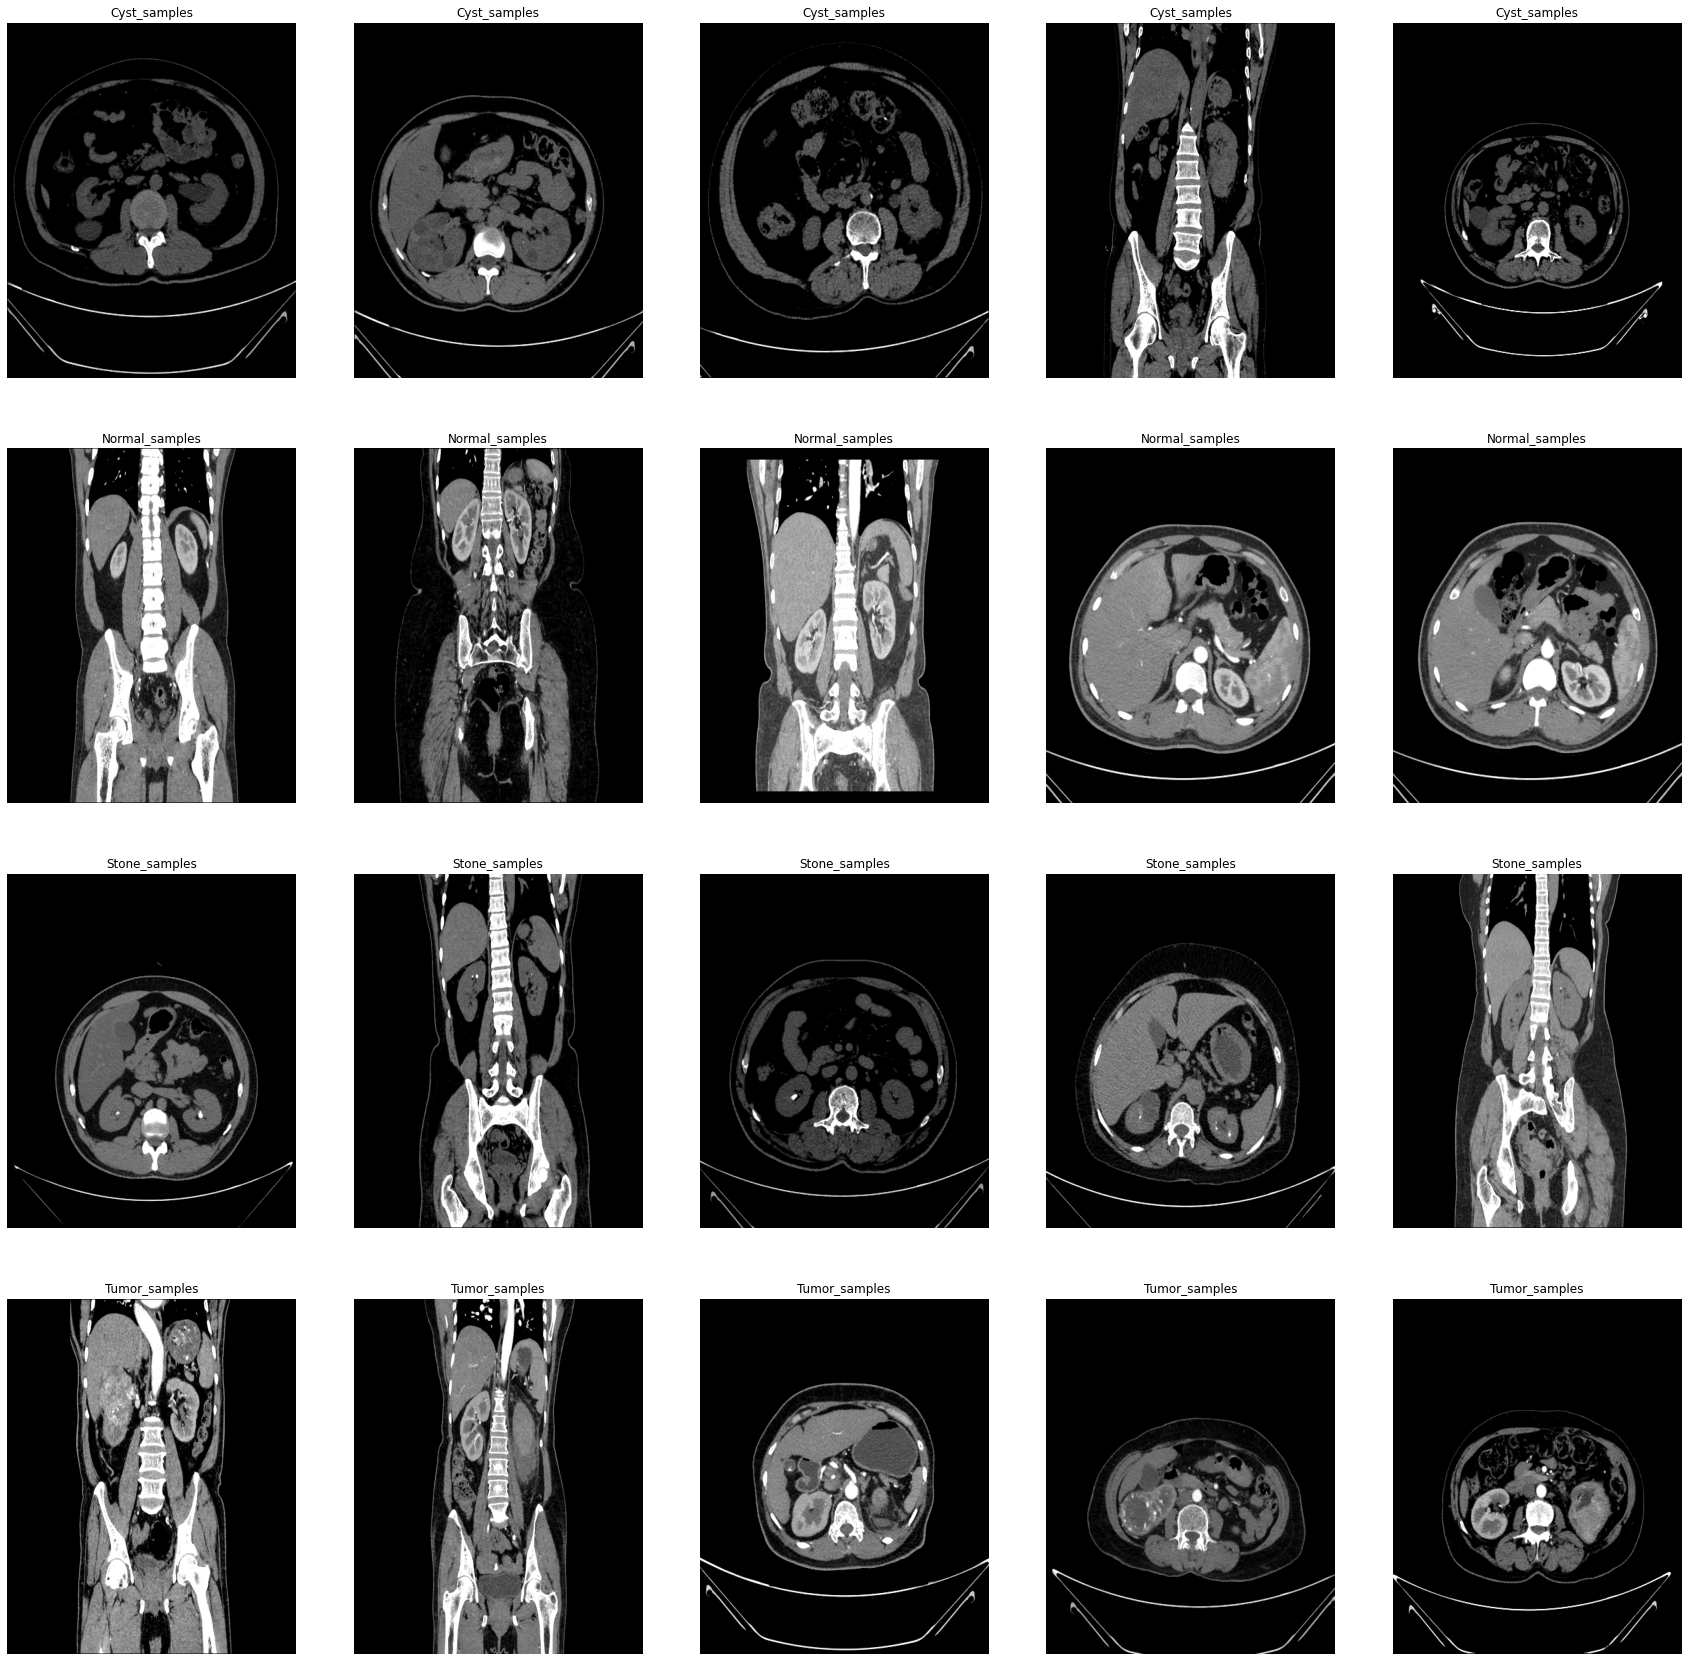

In [24]:
# Get few samples for both the classes
Cyst_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
Normal_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
Stone_samples = (train_data[train_data['label']==2]['image'].iloc[:5]).tolist()
Tumor_samples = (train_data[train_data['label']==3]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = Cyst_samples + Normal_samples+Stone_samples+Tumor_samples
del Cyst_samples, Normal_samples,Stone_samples,Tumor_samples

# Plot the data 
f, ax = plt.subplots(4,5, figsize=(30,30))
for i in range(20):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
        
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

# loading train image using cv2

In [25]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')
train_data = []
train_labels = []
#from keras.utils.np_utils import to_categorical

for img in Cyst_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Cyst'
    train_data.append(img)
    train_labels.append(label)

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label ='Normal'
    train_data.append(img)
    train_labels.append(label)
                      
for img in Stone_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Stone'
    train_data.append(img)
    train_labels.append(label)
    
for img in Tumor_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tumor'
    train_data.append(img)
    train_labels.append(label)
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (12446, 28, 28, 3)
Total number of labels: (12446,)


In [26]:
train_data1.shape

(12446, 28, 28, 3)

In [27]:
train_data1[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

# Train output file convert list to csv file 

In [28]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst


In [29]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [30]:
train_labels1['label']=train_labels1['label'].map({'Cyst':0,'Normal':1,
                                                   'Stone':2,'Tumor':3
                                                  })

In [31]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
12441,3
12442,3
12443,3
12444,3


In [32]:
print(train_data1.shape)
print(train_labels1.shape)


(12446, 28, 28, 3)
(12446, 1)


In [33]:
train_labels1.isnull().sum()

label    0
dtype: int64

# Solving image dataset imbalance using SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

0    5077
1    5077
2    5077
3    5077
Name: label, dtype: int64


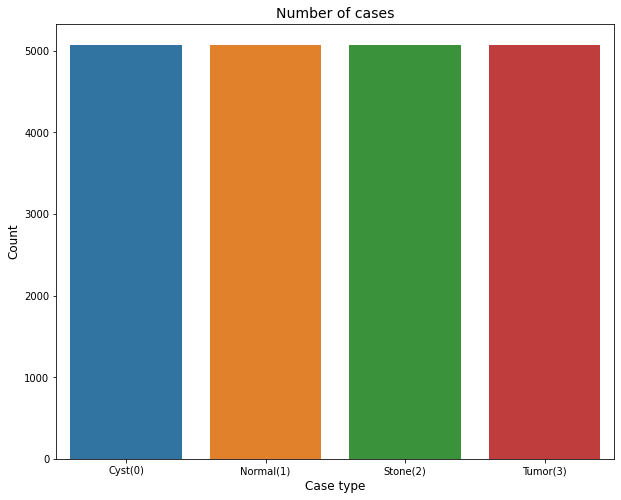

In [35]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [36]:
train_data2.shape

(20308, 2352)

In [37]:
train_labels2.shape

(20308, 1)

In [38]:
train_labels2['label'].value_counts()

0    5077
1    5077
2    5077
3    5077
Name: label, dtype: int64

In [39]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.13, random_state=42)


In [41]:
#import imblearn
#from imblearn.over_sampling import RandomOverSampler
#oversample =  RandomOverSampler(random_state=42)
#train_data2, train_labels2 = oversample.fit_resample(train_data1, train_labels1)

# **Augmentation
Data augmentation is a powerful technique which helps in almost every case for improving the robustness of a model. But augmentation can be much more helpful where the dataset is imbalanced. You can generate different samples of undersampled class in order to try to balance the overall distribution.

In [42]:
import tensorflow as tf
data_augmentation=tf.keras.preprocessing.image.ImageDataGenerator(
   rotation_range=30, horizontal_flip=True)

2022-07-04 13:51:11.437296: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-07-04 13:51:11.437460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [44]:


#from tensorflow import keras
#from tensorflow.keras import layers
#data_augmentation = keras.Sequential(
  #[
  #  layers.RandomFlip("horizontal",
  #                    input_shape=(28,
  #                                28,
   #                               3)),
 #   layers.RandomRotation(0.1),
#    layers.RandomZoom(0.1),
#  ]
#)

# Create the model

In [54]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    #data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 53,904
Trainable params: 53,904
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(264, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(4))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 640)              

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/10
553/553 [==============================] - 13s 22ms/step - loss: 0.1040 - accuracy: 0.9714 - val_loss: 0.0075 - val_accuracy: 0.9989
Epoch 2/10
553/553 [==============================] - 12s 22ms/step - loss: 0.0244 - accuracy: 0.9944 - val_loss: 0.0306 - val_accuracy: 0.9902
Epoch 3/10
553/553 [==============================] - 12s 21ms/step - loss: 0.0326 - accuracy: 0.9915 - val_loss: 0.0096 - val_accuracy: 0.9981
Epoch 4/10
553/553 [==============================] - 12s 22ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 9.2804e-04 - val_accuracy: 1.0000
Epoch 5/10
553/553 [==============================] - 12s 22ms/step - loss: 6.5943e-04 - accuracy: 1.0000 - val_loss: 4.8747e-04 - val_accuracy: 1.0000
Epoch 6/10
553/553 [==============================] - 12s 21ms/step - loss: 4.1058e-04 - accuracy: 1.0000 - val_loss: 3.3809e-04 - val_accuracy: 1.0000
Epoch 7/10
553/553 [==============================] - 12s 22ms/step - loss: 2.8005e-04 - accuracy: 1.0000 - val_loss

# Testing the a image with sample data

In [59]:
pic=[]
img = cv2.imread(str('../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1004).jpg'))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
#label = to_categorical(0, num_classes=2)
pic.append(img)
#pic_labels.append(pneu)


im

In [60]:
pic1 = np.array(pic)

In [61]:
a=model.predict(pic1)
a

array([[ 7.530356 , -3.3788867, -2.677151 , -3.2041287]], dtype=float32)

In [62]:
a.argmax()

0

In [ ]:
#datagen = ImageDataGenerator()
#datagen.fit(train)
#X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=batch_size)
#model.fit_generator(datagen, samples_per_epoch=len(train), epochs=epochs)

In [63]:
#!mkdir -p saved_model
model.save('kidney_model')

2022-07-04 14:11:53.716463: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [64]:
new_model = tf.keras.models.load_model('kidney_model')

# Check its architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 640)              

In [65]:
a=new_model.predict(pic1)
a

array([[ 7.530356 , -3.3788867, -2.677151 , -3.2041287]], dtype=float32)

In [66]:
np.argmax(a)

0

In [67]:
!zip -r file.zip ./model

	zip warning: name not matched: ./model

zip error: Nothing to do! (try: zip -r file.zip . -i ./model)
